In [1]:
from SIFT_gs.FIBSEM_SIFT_gs import *

Open CV version:  4.6.0
SIFT_gs version:  4.0.1


# Notes From J1 machine

02/09/2024 Loaded Cryo_LoadID_596_ROI3
	
	Testing with Sn on C Sample
		WD (mm)	StigX (%)	StigY (%)	ApertX	ApertY	FI
		2.88495	9.8	1.65	47.3	-30.0	64
		2.886	9.8	1.65	47.3	-30.0	29.33
		2.884	9.8	1.65	47.3	-30.0	77.84
		2.883	9.8	1.65	47.3	-30.0	54
		2.8842	9.8	1.65	47.3	-30.0	76.64
		2.8841	9.8	1.65	47.3	-30.0	74.87
		2.8842	10.5	1.65	47.3	-30.0	56.16
		2.8842	9.0	1.65	47.3	-30.0	84.24
		2.8842	8.5	1.65	47.3	-30.0	82.64
		2.8842	8.8	2.0	47.3	-30.0	74.37
		2.8842	8.8	1.0	47.3	-30.0	95.8
		2.8842	8.8	0.5	47.3	-30.0	93.1 (wiggles)
		2.8842	8.8	0.8	60.0	-30.0	71.84
		2.8842	8.8	0.5	35.0	-30.0	66.78
		2.8842	8.8	0.5	50.0	-30.0	93.16
		2.8842	8.8	0.5	48.0	-30.0	95.034
		2.8842	8.8	0.5	48.0	-30.0	94.187
		2.8842	8.8	0.5	48.0	-35.0	88.55
		2.8842	8.8	0.5	48.0	-25.0	83.52
		2.8842	8.8	0.5	48.0	-31.0	95.09
		2.8840	8.8	0.5	48.0	-31.0	97.9
		2.8840	8.8	0.5	48.0	-31.0	97.2
		2.8838	8.8	0.5	48.0	-31.0	94.8
		2.8840	9.0	0.5	48.0	-31.0	95.49
		2.8840	8.6	0.5	48.0	-31.0	96.82
		2.8840	8.75	0.8	48.0	-31.0	88.84
		2.8840	8.75	0.2	48.0	-31.0	93.97
		2.8840	8.75	0.4	48.0	-31.0	97.00
		same					96.51

	17:22 Starting  Cryo_LoadID_596_ROI3
		Re-started FIB-GUN without reheat - successful.
		Regulating 1.5uA @ Vextr=6.88kV, Vsuppr=991V.
		FIB resource: 3218 uAhr.
	17:33 Starting Coarse milling.
		SEM: ETH=0.9kV. Aperture 30um(1), High Current, Analytic. f=1.0MHz (Coarse), 100.0kHz (Fine)
		FIB: 15nA-4, Vobj = 14140, CL 4.0s @ 4.0nA
	17:53 Switched to fine milling @ 100kHz.
		
02/10/2024 Continue  Cryo_LoadID_596_ROI3
	10:51  Change CL from 4.0s @ 4.0nA to 3.9s @ 3.9nA

02/11/2024 Continue  Cryo_LoadID_596_ROI3
	06:23 Changed Sampling speed from 100kHz to 50kHz
	
02/12/2024 Continue  Cryo_LoadID_596_ROI3
	11:09 paused Milling - images are fuzzy. FI = 0.179
	11:30 Re-aligned SEM manually (WD, Stig). Took another SEM image FI=0.233 - not much better than before.
	11:39. Switched from Aperture 30(1) to 30(2). Manually re-aligned SEM (WD, Stig, Apert). Took another SEM image
	11:58. Re-started FIB. Suppressor @ 634V
		SEM: ETH=0.9kV. Aperture 30um(2), High Current, Analytic. f=100.0kHz
		Noticed that after software restart the Stig/Aperture values got reset.
		Re-aligned and re-started with proper settings. 
		Also noticed that the NI software is not tracking the rapid changes in optimal Stig. Opened those from 9=0.8% / 7pts up to 1.2% / 11pts. Similarly, WD from 1800nm / 7pts to 2500nm/11pts.

02/13/2024 Continue  Cryo_LoadID_596_ROI3
	10:45. Imaging looked OK, tracking better. But strong variations of optimal Stig.
	10:45 Stopped milling, switched back to Aperture 30(1). Re-aligned SEM and re-started 3D-ING
	16:47 Image quality degraded dramatically. Stopped milling.


In [3]:
J1_csv_file = 'Y:/Images Jeiss1/Cryo/Y2024/M02/D13/2024-02-13.csv'
J1_records_20240213 = pd.read_csv(J1_csv_file)
J1_records_20240213.head()

,Date,Time,Notes,Detector A,Detector B,Detector C,Detector D,Detectors,X resolution,Y resolution,...,FIB Faraday Cup (nA),Specimen I (nA),Milling Beam Dump 1 (nA),Milling Beam Dump 2 (nA),Milling I (nA),SEM Specimen I (nA),Milling Z voltage (V),Image Delta X (nm),Image Delta Y (nm),Image Delta Z
0,2/13/2024,12:00:00 AM,"Cryo_LID596_ROI3 BF 100x60 um, 4.0nA/4.0s @ 4n...",InLens,ESB @ 200 V,Detector C,Detector D,2,5000,2000,...,14.984131,-26.542267,10.634437,0.018992,4.361903,0.260925,1.72639,-13.520271,5.736354,0.173650
1,2/13/2024,12:02:09 AM,"Cryo_LID596_ROI3 BF 100x60 um, 4.0nA/4.0s @ 4n...",InLens,ESB @ 200 V,Detector C,Detector D,2,5000,2000,...,14.985352,-23.886679,11.002418,0.017322,4.024439,0.260536,1.72453,21.722103,-6.466249,0.142888
2,2/13/2024,12:04:19 AM,"Cryo_LID596_ROI3 BF 100x60 um, 4.0nA/4.0s @ 4n...",InLens,ESB @ 200 V,Detector C,Detector D,2,5000,2000,...,14.982910,-26.609980,11.003320,0.018934,4.011330,0.260843,1.71939,-13.440197,0.513563,0.170591
3,2/13/2024,12:06:28 AM,"Cryo_LID596_ROI3 BF 100x60 um, 4.0nA/4.0s @ 4n...",InLens,ESB @ 200 V,Detector C,Detector D,2,5000,2000,...,14.978027,-29.262260,10.663692,0.020061,4.344854,0.261041,1.72033,3.207500,10.155515,0.179946
4,2/13/2024,12:08:38 AM,"Cryo_LID596_ROI3 BF 100x60 um, 4.0nA/4.0s @ 4n...",InLens,ESB @ 200 V,Detector C,Detector D,2,5000,2000,...,14.969482,-26.545269,11.001404,0.018975,4.013246,0.260823,1.72538,-5.295337,-5.065150,0.161530


In [10]:
J1_records_20240213.columns

Index(['Date', 'Time', 'Notes', 'Detector A', 'Detector B', 'Detector C',
       'Detector D', 'Detectors', 'X resolution', 'Y resolution', 'Rate (Hz)',
       'Brightness A (%)', 'Contrast A (%)', 'Brightness B (%)',
       'Contrast B (%)', 'Magnification', 'Pixel size (nm)',
       'Working Distance (mm)', 'EHT (kV)', 'Aperture #', 'High Current Mode',
       'Probe Current (A)', 'Beam Shift X', 'Beam Shift Y', 'Stigmation X',
       'Stigmation Y', 'Alignment X', 'Alignment Y', 'FIB spacing (nm)',
       'A Img Focus Index', 'B Img Focus Index', 'A Img FRC resolution (nm)',
       'B Img FRC resolution (nm)', 'A Img Primary Grid Mean',
       'A Img Primary Grid Std', 'B Img Primary Grid Mean',
       'B Img Primary Grid Std', 'Temp (F)', 'FIB Faraday Cup (nA)',
       'Specimen I (nA)', 'Milling Beam Dump 1 (nA)',
       'Milling Beam Dump 2 (nA)', 'Milling I (nA)', 'SEM Specimen I (nA)',
       'Milling Z voltage (V)', 'Image Delta X (nm)', 'Image Delta Y (nm)',
       'Image Del

In [21]:
J1_csv_file = 'Y:/Images Jeiss1/Cryo/Y2024/M02/2024-02.csv'
J1_records_202402 = pd.read_csv(J1_csv_file)


Time = J1_records_202402['Time']
WD = J1_records_202402['Working Distance (mm)']
FI = J1_records_202402['A Img Focus Index']
StigX = J1_records_202402['Stigmation X']
StigY = J1_records_202402['Stigmation Y']
ApertX = J1_records_202402['Alignment X']
ApertY = J1_records_202402['Alignment Y']
J1_records_202402.head()

,Date,Time,Notes,Detector A,Detector B,Detector C,Detector D,Detectors,X resolution,Y resolution,...,FIB Faraday Cup (nA),Specimen I (nA),Milling Beam Dump 1 (nA),Milling Beam Dump 2 (nA),Milling I (nA),SEM Specimen I (nA),Milling Z voltage (V),Image Delta X (nm),Image Delta Y (nm),Image Delta Z
0,2/8/2024,3:25:07 PM,"Cryo_LID594_ROI1 BF 100x60 um, 4.2nA/4.2s @ 4n...",InLens,ESB @ 200 V,Detector C,Detector D,2,20000,8000,...,15.087890,-7.466703,13.964670,0.003657,1.098806,0.254959,2.27528,0.0,0.0,0.000000
1,2/8/2024,3:29:04 PM,"Cryo_LID594_ROI1 BF 100x60 um, 4.2nA/4.2s @ 4n...",InLens,ESB @ 200 V,Detector C,Detector D,2,5000,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2/8/2024,3:29:04 PM,"Cryo_LID594_ROI1 BF 100x60 um, 4.2nA/4.2s @ 4n...",InLens,ESB @ 200 V,Detector C,Detector D,2,5000,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/8/2024,3:29:04 PM,"Cryo_LID594_ROI1 BF 100x60 um, 4.2nA/4.2s @ 4n...",InLens,ESB @ 200 V,Detector C,Detector D,2,5000,2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/8/2024,3:29:04 PM,"Cryo_LID594_ROI1 BF 100x60 um, 4.2nA/4.2s @ 4n...",InLens,ESB @ 200 V,Detector C,Detector D,2,5000,2000,...,14.984131,-24.885908,10.871332,0.017512,4.253180,0.286526,2.25519,0.0,0.0,161.894653


In [45]:
len(J1_records_202402)

2953

In [54]:
fls_dir = os.path.normpath('Y:/Images Jeiss1/Cryo/Y2024/M02')
days = ['D{:02d}'.format(day) for day in np.arange(7, 32)]
fls=[]
ftype=0
for day in days:
    fls_dir_t = os.path.join(fls_dir, day)
    if ftype == 0:
        fls1 = sorted(glob.glob(os.path.join(fls_dir_t,'*.dat')))
        if len(fls1) < 1:
            fls1 = sorted(glob.glob(os.path.join(fls_dir_t,'*/*.dat')))

    fls = fls + fls1

nfrs = len(fls)
print('Total Number of frames to process: ', nfrs) 

Total Number of frames to process:  2951


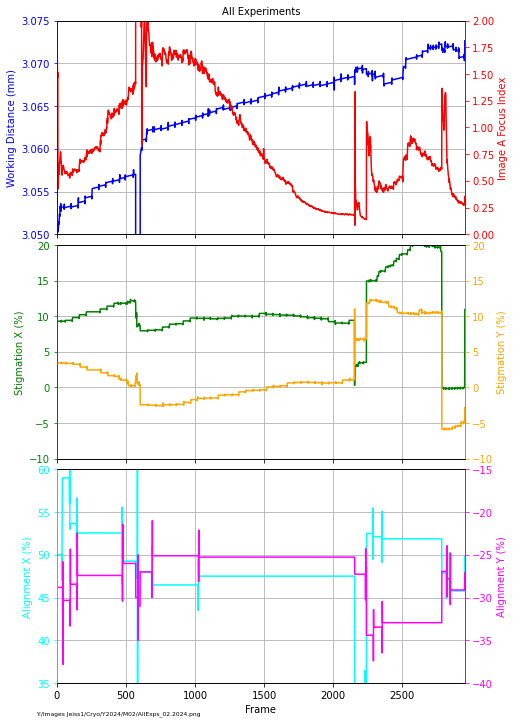

In [52]:
figname = 'Y:/Images Jeiss1/Cryo/Y2024/M02/AllExps_02.2024.png'
title = 'All Experiments'
xi = 0
xa = len(J1_records_202402)

wd_yi = 3.050
wd_ya = 3.075
FI_yi = 0.0
FI_ya = 2.0
StigX_yi = -10.0
StigX_ya = 20.0
StigY_yi = -10.0
StigY_ya = 20.0
ApertX_yi = 35
ApertX_ya = 60
ApertY_yi = -40.0
ApertY_ya = -15.0

fig, axs = subplots(3, 1, figsize = (7, 10), sharex=True)
fig.subplots_adjust(left=0.1, bottom=0.05, right=0.91, top=0.97, wspace=0.05, hspace=0.05)

ax_WD = axs[0]
ax_FI = axs[0].twinx()
ax_StigX = axs[1]
ax_StigY = axs[1].twinx()
ax_ApertX = axs[2]
ax_ApertY = axs[2].twinx()

ax_WD.set_title(title, fontsize=10)
axs[-1].text(-0.05, -0.15, figname, transform=axs[-1].transAxes, fontsize=6)

WD_color= 'blue'
ax_WD.plot(WD, color = WD_color, label = 'Working Distance (mm)')
ax_WD.set_ylabel('Working Distance (mm)', color = WD_color)
ax_WD.set_ylim(wd_yi, wd_ya)
ax_FI.spines['left'].set_color(WD_color)
ax_WD.tick_params(axis='y', colors=WD_color)

FI_color= 'red'
ax_FI.plot(FI, color = FI_color, label = 'Focus Index')
ax_FI.set_ylim(FI_yi, FI_ya)
ax_FI.set_ylabel('Image A Focus Index', color = FI_color)

ax_FI.spines['right'].set_color(FI_color)
ax_FI.tick_params(axis='y', colors=FI_color)

StigX_color= 'green'
ax_StigX.plot(StigX, color = StigX_color, label = 'Stigmation X (%)')
ax_StigX.set_ylim(StigX_yi, StigX_ya)
ax_StigX.set_ylabel('Stigmation X (%)', color = StigX_color)
ax_StigY.spines['left'].set_color(StigX_color)
ax_StigX.tick_params(axis='y', colors=StigX_color)

StigY_color= 'orange'
ax_StigY.plot(StigY, color = StigY_color, label = 'Stigmation Y (%)')
ax_StigY.set_ylim(StigY_yi, StigY_ya)
ax_StigY.set_ylabel('Stigmation Y (%)', color = StigY_color)
ax_StigY.spines['right'].set_color(StigY_color)
ax_StigY.tick_params(axis='y', colors=StigY_color)

ApertX_color= 'cyan'
ax_ApertX.plot(ApertX, color = ApertX_color, label = 'Alignment X (%)')
ax_ApertX.set_ylim(ApertX_yi, ApertX_ya)
ax_ApertX.set_ylabel('Alignment X (%)', color = ApertX_color)
ax_ApertY.spines['left'].set_color(ApertX_color)
ax_ApertX.tick_params(axis='y', colors=ApertX_color)

ApertY_color= 'magenta'
ax_ApertY.plot(ApertY, color = ApertY_color, label = 'Alignment Y (%)')
ax_ApertY.set_ylim(ApertY_yi, ApertY_ya)
ax_ApertY.set_ylabel('Alignment Y (%)', color = ApertY_color)
ax_ApertY.spines['right'].set_color(ApertY_color)
ax_ApertY.tick_params(axis='y', colors=ApertY_color)

axs[-1].set_xlabel('Frame')
axs[-1].set_xlim(xi, xa)
for ax in axs:
    ax.grid(True)
    
fig.savefig(figname, dpi=300)

# Experiment 1 Apert 30um(1). Original Tracking Windows. Feb. Frames 800 - 1890

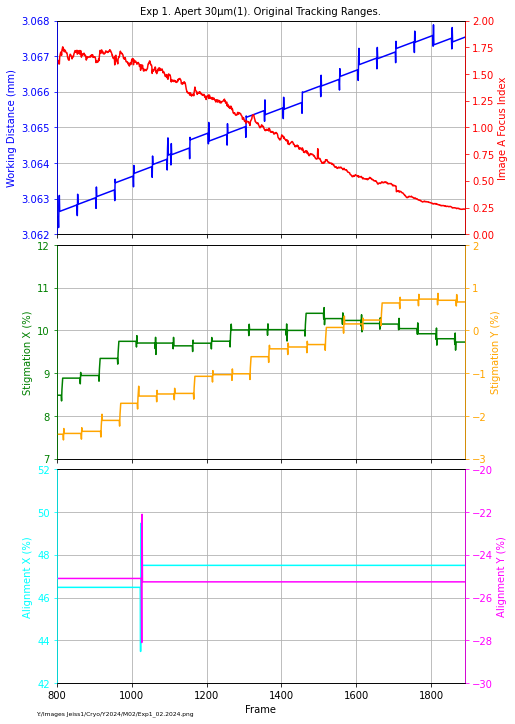

In [53]:
figname = 'Y:/Images Jeiss1/Cryo/Y2024/M02/Exp1_02.2024.png'

title = 'Exp 1. Apert 30μm(1). Original Tracking Ranges.'

xi = 800
xa = 1890

wd_yi = 3.062
wd_ya = 3.068
FI_yi = 0.0
FI_ya = 2.0
StigX_yi = 7.0
StigX_ya = 12.0
StigY_yi = -3.0
StigY_ya = 2.0
ApertX_yi = 42
ApertX_ya = 52
ApertY_yi = -30.0
ApertY_ya = -20.0

fig, axs = subplots(3, 1, figsize = (7, 10), sharex=True)
fig.subplots_adjust(left=0.1, bottom=0.05, right=0.91, top=0.97, wspace=0.05, hspace=0.05)

ax_WD = axs[0]
ax_FI = axs[0].twinx()
ax_StigX = axs[1]
ax_StigY = axs[1].twinx()
ax_ApertX = axs[2]
ax_ApertY = axs[2].twinx()

ax_WD.set_title(title, fontsize=10)
axs[-1].text(-0.05, -0.15, figname, transform=axs[-1].transAxes, fontsize=6)

WD_color= 'blue'
ax_WD.plot(WD, color = WD_color, label = 'Working Distance (mm)')
ax_WD.set_ylabel('Working Distance (mm)', color = WD_color)
ax_WD.set_ylim(wd_yi, wd_ya)
ax_FI.spines['left'].set_color(WD_color)
ax_WD.tick_params(axis='y', colors=WD_color)

FI_color= 'red'
ax_FI.plot(FI, color = FI_color, label = 'Focus Index')
ax_FI.set_ylim(FI_yi, FI_ya)
ax_FI.set_ylabel('Image A Focus Index', color = FI_color)

ax_FI.spines['right'].set_color(FI_color)
ax_FI.tick_params(axis='y', colors=FI_color)

StigX_color= 'green'
ax_StigX.plot(StigX, color = StigX_color, label = 'Stigmation X (%)')
ax_StigX.set_ylim(StigX_yi, StigX_ya)
ax_StigX.set_ylabel('Stigmation X (%)', color = StigX_color)
ax_StigY.spines['left'].set_color(StigX_color)
ax_StigX.tick_params(axis='y', colors=StigX_color)

StigY_color= 'orange'
ax_StigY.plot(StigY, color = StigY_color, label = 'Stigmation Y (%)')
ax_StigY.set_ylim(StigY_yi, StigY_ya)
ax_StigY.set_ylabel('Stigmation Y (%)', color = StigY_color)
ax_StigY.spines['right'].set_color(StigY_color)
ax_StigY.tick_params(axis='y', colors=StigY_color)

ApertX_color= 'cyan'
ax_ApertX.plot(ApertX, color = ApertX_color, label = 'Alignment X (%)')
ax_ApertX.set_ylim(ApertX_yi, ApertX_ya)
ax_ApertX.set_ylabel('Alignment X (%)', color = ApertX_color)
ax_ApertY.spines['left'].set_color(ApertX_color)
ax_ApertX.tick_params(axis='y', colors=ApertX_color)

ApertY_color= 'magenta'
ax_ApertY.plot(ApertY, color = ApertY_color, label = 'Alignment Y (%)')
ax_ApertY.set_ylim(ApertY_yi, ApertY_ya)
ax_ApertY.set_ylabel('Alignment Y (%)', color = ApertY_color)
ax_ApertY.spines['right'].set_color(ApertY_color)
ax_ApertY.tick_params(axis='y', colors=ApertY_color)

axs[-1].set_xlabel('Frame')
axs[-1].set_xlim(xi, xa)
for ax in axs:
    ax.grid(True)
    
fig.savefig(figname, dpi=300)

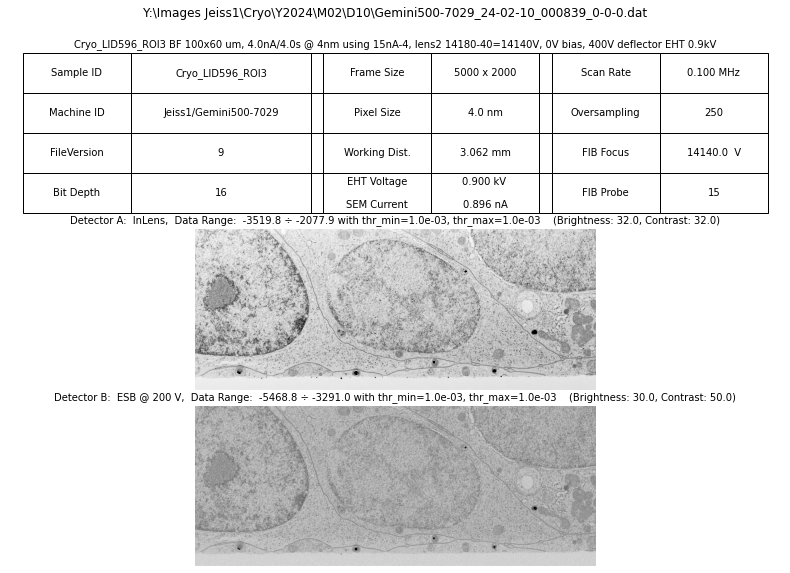

In [79]:
Frame_inds = [800, 1890]
Frames = [FIBSEM_frame(fls[id]) for id in Frame_inds]
Frames[0].save_snapshot()

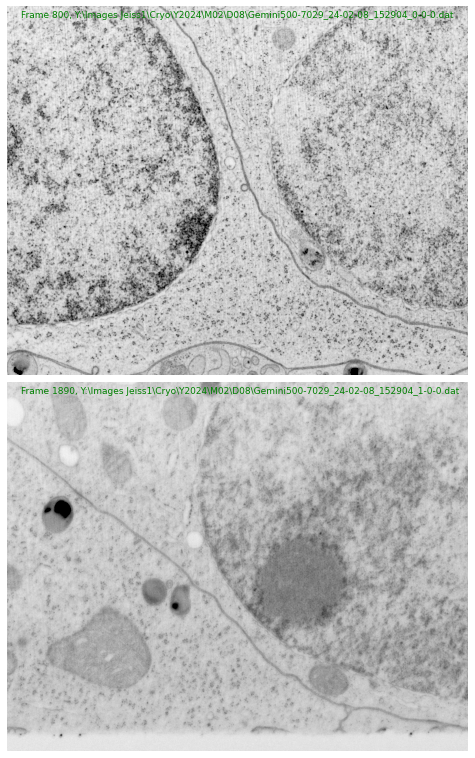

In [80]:
figname = 'Y:/Images Jeiss1/Cryo/Y2024/M02/Exp1_02.2024_Examples.png'
fig, axs = subplots(2, 1, figsize = (8, 11))
fig.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97, wspace=0.02, hspace=0.02)
vmin, vmax = get_min_max_thresholds(Frames[0].RawImageA[0:1500, 0:1500], disp_res=False)
for j, frame in enumerate(Frames):
    ax = axs[j]
    ax.imshow(frame.RawImageA[200:1800, 500:2500], cmap='Greys', vmin=vmin, vmax=vmax)
    ax.axis(False)
    ax.text(0.03, 0.97, 'Frame {:d}, '.format(Frame_inds[j]) + fls[j], transform=ax.transAxes, fontsize=9, color = 'green')
    
fig.savefig(figname, dpi=600)

# Experiment 2 Apert 30um(2). Increased Tracking Windows. Feb. Frames 2250 - 2780

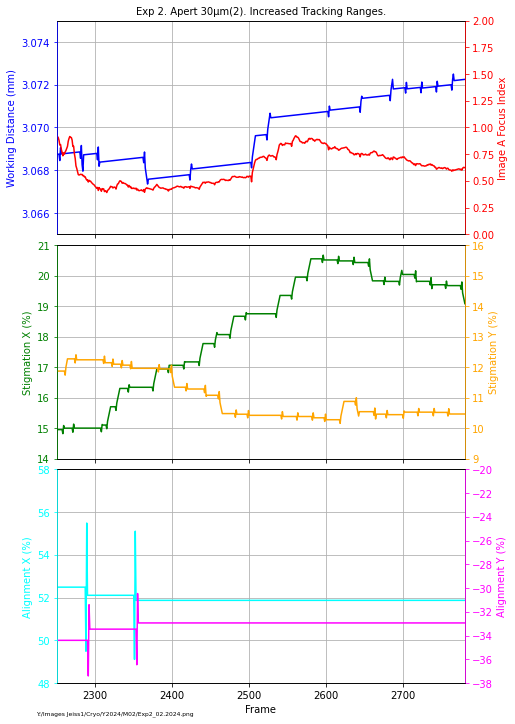

In [94]:
figname = 'Y:/Images Jeiss1/Cryo/Y2024/M02/Exp2_02.2024.png'

title = 'Exp 2. Apert 30μm(2). Increased Tracking Ranges.'

xi = 2250
xa = 2780

wd_yi = 3.065
wd_ya = 3.075
FI_yi = 0.0
FI_ya = 2.0
StigX_yi = 14.0
StigX_ya = 21.0
StigY_yi = 9.0
StigY_ya = 16.0
ApertX_yi = 48
ApertX_ya = 58
ApertY_yi = -38.0
ApertY_ya = -20.0

fig, axs = subplots(3, 1, figsize = (7, 10), sharex=True)
fig.subplots_adjust(left=0.1, bottom=0.05, right=0.91, top=0.97, wspace=0.05, hspace=0.05)

ax_WD = axs[0]
ax_FI = axs[0].twinx()
ax_StigX = axs[1]
ax_StigY = axs[1].twinx()
ax_ApertX = axs[2]
ax_ApertY = axs[2].twinx()

ax_WD.set_title(title, fontsize=10)
axs[-1].text(-0.05, -0.15, figname, transform=axs[-1].transAxes, fontsize=6)

WD_color= 'blue'
ax_WD.plot(WD, color = WD_color, label = 'Working Distance (mm)')
ax_WD.set_ylabel('Working Distance (mm)', color = WD_color)
ax_WD.set_ylim(wd_yi, wd_ya)
ax_FI.spines['left'].set_color(WD_color)
ax_WD.tick_params(axis='y', colors=WD_color)

FI_color= 'red'
ax_FI.plot(FI, color = FI_color, label = 'Focus Index')
ax_FI.set_ylim(FI_yi, FI_ya)
ax_FI.set_ylabel('Image A Focus Index', color = FI_color)

ax_FI.spines['right'].set_color(FI_color)
ax_FI.tick_params(axis='y', colors=FI_color)

StigX_color= 'green'
ax_StigX.plot(StigX, color = StigX_color, label = 'Stigmation X (%)')
ax_StigX.set_ylim(StigX_yi, StigX_ya)
ax_StigX.set_ylabel('Stigmation X (%)', color = StigX_color)
ax_StigY.spines['left'].set_color(StigX_color)
ax_StigX.tick_params(axis='y', colors=StigX_color)

StigY_color= 'orange'
ax_StigY.plot(StigY, color = StigY_color, label = 'Stigmation Y (%)')
ax_StigY.set_ylim(StigY_yi, StigY_ya)
ax_StigY.set_ylabel('Stigmation Y (%)', color = StigY_color)
ax_StigY.spines['right'].set_color(StigY_color)
ax_StigY.tick_params(axis='y', colors=StigY_color)

ApertX_color= 'cyan'
ax_ApertX.plot(ApertX, color = ApertX_color, label = 'Alignment X (%)')
ax_ApertX.set_ylim(ApertX_yi, ApertX_ya)
ax_ApertX.set_ylabel('Alignment X (%)', color = ApertX_color)
ax_ApertY.spines['left'].set_color(ApertX_color)
ax_ApertX.tick_params(axis='y', colors=ApertX_color)

ApertY_color= 'magenta'
ax_ApertY.plot(ApertY, color = ApertY_color, label = 'Alignment Y (%)')
ax_ApertY.set_ylim(ApertY_yi, ApertY_ya)
ax_ApertY.set_ylabel('Alignment Y (%)', color = ApertY_color)
ax_ApertY.spines['right'].set_color(ApertY_color)
ax_ApertY.tick_params(axis='y', colors=ApertY_color)

axs[-1].set_xlabel('Frame')
axs[-1].set_xlim(xi, xa)
for ax in axs:
    ax.grid(True)
    
fig.savefig(figname, dpi=300)

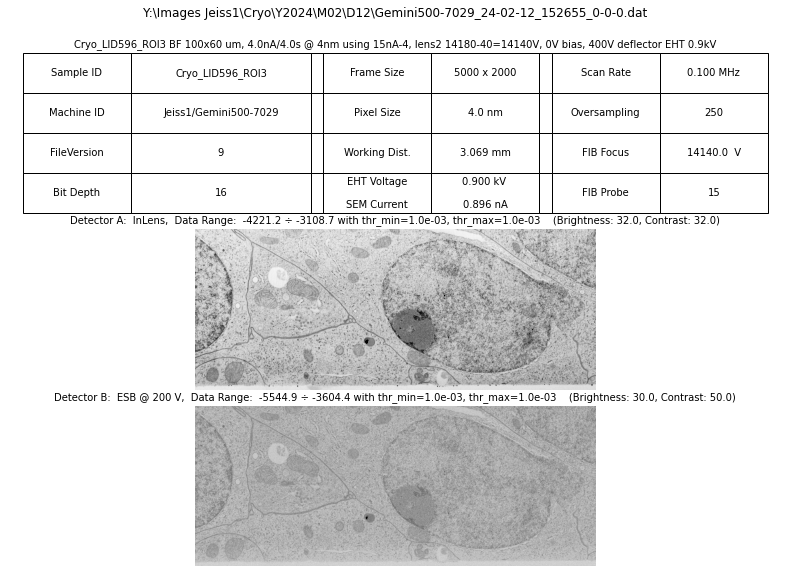

In [95]:
Frame_inds = [2250, 2780]
Frames = [FIBSEM_frame(fls[id]) for id in Frame_inds]
Frames[0].save_snapshot()

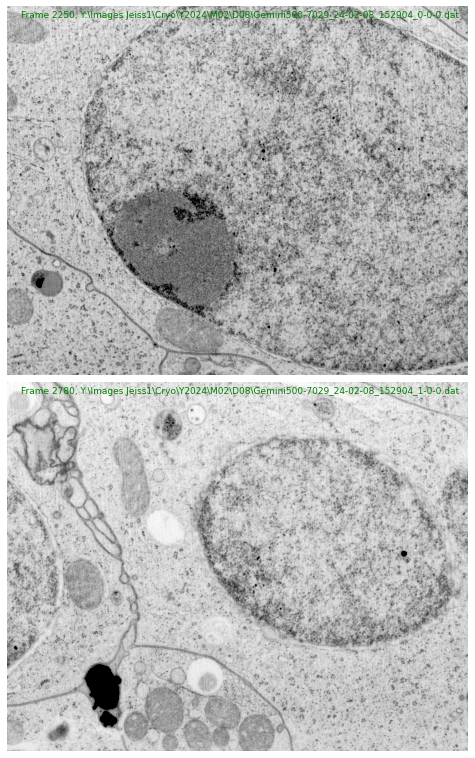

In [96]:
figname = 'Y:/Images Jeiss1/Cryo/Y2024/M02/Exp2_02.2024_Examples.png'
fig, axs = subplots(2, 1, figsize = (8, 11))
fig.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97, wspace=0.02, hspace=0.02)
vmin, vmax = get_min_max_thresholds(Frames[0].RawImageA[0:1500, 0:1500], disp_res=False)
for j, frame in enumerate(Frames):
    ax = axs[j]
    ax.imshow(frame.RawImageA[200:1800, 2000:4000], cmap='Greys', vmin=vmin, vmax=vmax)
    ax.axis(False)
    ax.text(0.03, 0.97, 'Frame {:d}, '.format(Frame_inds[j]) + fls[j], transform=ax.transAxes, fontsize=9, color = 'green')
    
fig.savefig(figname, dpi=600)

# Experiment 3 Apert 30um(1). Increased Tracking Windows. Feb. Frames 2800 - 2950

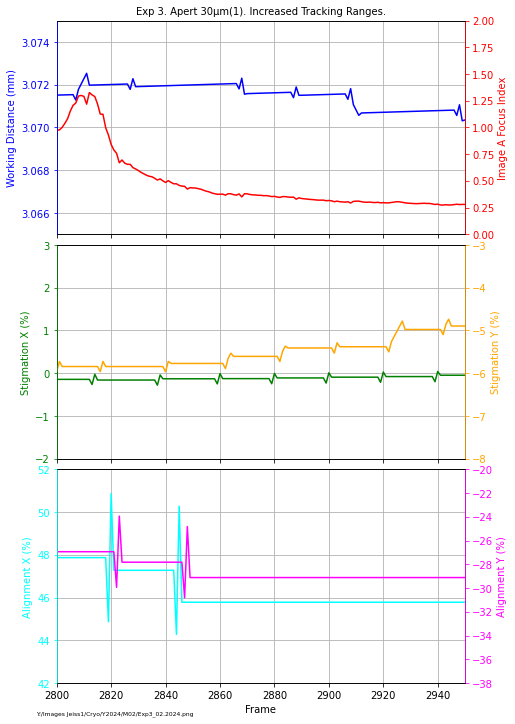

In [87]:
figname = 'Y:/Images Jeiss1/Cryo/Y2024/M02/Exp3_02.2024.png'

title = 'Exp 3. Apert 30μm(1). Increased Tracking Ranges.'

xi = 2800
xa = 2950

wd_yi = 3.065
wd_ya = 3.075
FI_yi = 0.0
FI_ya = 2.0
StigX_yi = -2.0
StigX_ya = 3.0
StigY_yi = -8.0
StigY_ya = -3.0
ApertX_yi = 42
ApertX_ya = 52
ApertY_yi = -38.0
ApertY_ya = -20.0

fig, axs = subplots(3, 1, figsize = (7, 10), sharex=True)
fig.subplots_adjust(left=0.1, bottom=0.05, right=0.91, top=0.97, wspace=0.05, hspace=0.05)

ax_WD = axs[0]
ax_FI = axs[0].twinx()
ax_StigX = axs[1]
ax_StigY = axs[1].twinx()
ax_ApertX = axs[2]
ax_ApertY = axs[2].twinx()

ax_WD.set_title(title, fontsize=10)
axs[-1].text(-0.05, -0.15, figname, transform=axs[-1].transAxes, fontsize=6)

WD_color= 'blue'
ax_WD.plot(WD, color = WD_color, label = 'Working Distance (mm)')
ax_WD.set_ylabel('Working Distance (mm)', color = WD_color)
ax_WD.set_ylim(wd_yi, wd_ya)
ax_FI.spines['left'].set_color(WD_color)
ax_WD.tick_params(axis='y', colors=WD_color)

FI_color= 'red'
ax_FI.plot(FI, color = FI_color, label = 'Focus Index')
ax_FI.set_ylim(FI_yi, FI_ya)
ax_FI.set_ylabel('Image A Focus Index', color = FI_color)

ax_FI.spines['right'].set_color(FI_color)
ax_FI.tick_params(axis='y', colors=FI_color)

StigX_color= 'green'
ax_StigX.plot(StigX, color = StigX_color, label = 'Stigmation X (%)')
ax_StigX.set_ylim(StigX_yi, StigX_ya)
ax_StigX.set_ylabel('Stigmation X (%)', color = StigX_color)
ax_StigY.spines['left'].set_color(StigX_color)
ax_StigX.tick_params(axis='y', colors=StigX_color)

StigY_color= 'orange'
ax_StigY.plot(StigY, color = StigY_color, label = 'Stigmation Y (%)')
ax_StigY.set_ylim(StigY_yi, StigY_ya)
ax_StigY.set_ylabel('Stigmation Y (%)', color = StigY_color)
ax_StigY.spines['right'].set_color(StigY_color)
ax_StigY.tick_params(axis='y', colors=StigY_color)

ApertX_color= 'cyan'
ax_ApertX.plot(ApertX, color = ApertX_color, label = 'Alignment X (%)')
ax_ApertX.set_ylim(ApertX_yi, ApertX_ya)
ax_ApertX.set_ylabel('Alignment X (%)', color = ApertX_color)
ax_ApertY.spines['left'].set_color(ApertX_color)
ax_ApertX.tick_params(axis='y', colors=ApertX_color)

ApertY_color= 'magenta'
ax_ApertY.plot(ApertY, color = ApertY_color, label = 'Alignment Y (%)')
ax_ApertY.set_ylim(ApertY_yi, ApertY_ya)
ax_ApertY.set_ylabel('Alignment Y (%)', color = ApertY_color)
ax_ApertY.spines['right'].set_color(ApertY_color)
ax_ApertY.tick_params(axis='y', colors=ApertY_color)

axs[-1].set_xlabel('Frame')
axs[-1].set_xlim(xi, xa)
for ax in axs:
    ax.grid(True)
    
fig.savefig(figname, dpi=300)

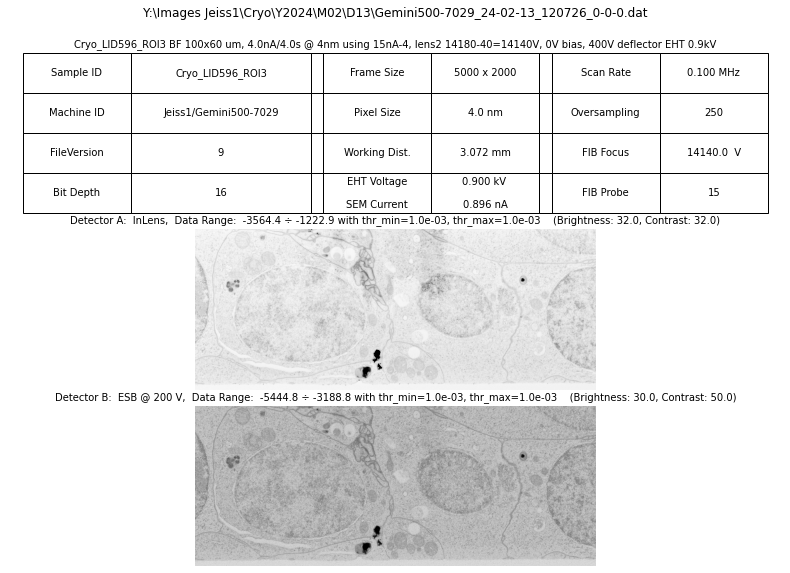

In [91]:
Frame_inds = [2820, 2940]
Frames = [FIBSEM_frame(fls[id]) for id in Frame_inds]
Frames[0].save_snapshot()

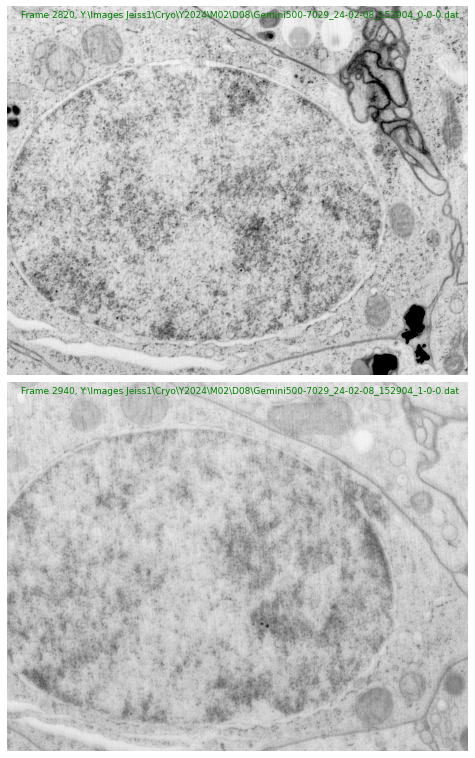

In [93]:
figname = 'Y:/Images Jeiss1/Cryo/Y2024/M02/Exp3_02.2024_Examples.png'
fig, axs = subplots(2, 1, figsize = (8, 11))
fig.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97, wspace=0.02, hspace=0.02)
vmin, vmax = get_min_max_thresholds(Frames[0].RawImageA[0:1500, 0:1500], disp_res=False)
for j, frame in enumerate(Frames):
    ax = axs[j]
    ax.imshow(frame.RawImageA[200:1800, 500:2500], cmap='Greys', vmin=vmin, vmax=vmax)
    ax.axis(False)
    ax.text(0.03, 0.97, 'Frame {:d}, '.format(Frame_inds[j]) + fls[j], transform=ax.transAxes, fontsize=9, color = 'green')
    
fig.savefig(figname, dpi=600)